In [1]:
import tensorflow as tf

In [2]:
x = tf.random.normal([2,4])
w = tf.random.normal([4,3])
b = tf.random.normal([3])
y = tf.constant([2,0])


In [4]:
with tf.GradientTape() as tape:
    tape.watch([w,b])
    prob = tf.nn.softmax(x@w+b,axis=1)
    loss  = tf.reduce_mean(tf.losses.MSE(tf.one_hot(y,depth=3),prob))
    
grads =tape.gradient(loss,[w,b])
grads[0],grads[1]

(<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
 array([[-0.00836263, -0.00024519,  0.00860782],
        [-0.04183641, -0.00234477,  0.04418117],
        [ 0.0126186 ,  0.00050321, -0.0131218 ],
        [ 0.00155437,  0.0004044 , -0.00195877]], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.0330148 , -0.00163381,  0.03464861], dtype=float32)>)

In [8]:
x = tf.constant(1.)
w1 = tf.constant(2.)
b1 = tf.constant(1.)
w2 = tf.constant(2.)
b2 = tf.constant(1.)

#多次求导需要有persistent=True
with tf.GradientTape(persistent=True) as tape:
    tape.watch([w1,b1,w2,b2])
    y1 = x*w1+b1
    y2 = y1*w2+b2
    
dy2_dy1 = tape.gradient(y2,[y1])[0]
dy1_dw1 = tape.gradient(y1,[w1])[0]
dy2_dw1 = tape.gradient(y2,[w1])[0]


dy2_dy1,dy1_dw1,dy2_dw1

(<tf.Tensor: shape=(), dtype=float32, numpy=2.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0>)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

C:\Users\14143\AppData\Local\Temp\ipykernel_2992\2120325814.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = flg.gca(projection='3d')


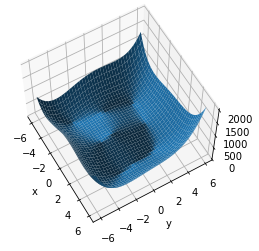

In [15]:
def himmelbau(x):
    return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2

x = np.arange(-6,6,0.1)
y = np.arange(-6,6,0.1)
X,Y = np.meshgrid(x,y)
Z = himmelbau([X,Y])

flg = plt.figure('himmelblau')
ax = flg.gca(projection='3d')
ax.plot_surface(X,Y,Z)
ax.view_init(60,-30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [19]:
x = tf.constant([-4,0.])
for step in range(1000):
    with tf.GradientTape() as tape:
        tape.watch([x])
        y = himmelbau(x)
    grads = tape.gradient(y,[x])[0]
    x -= 0.01*grads
    if step%20 == 0:
        print(f'step : {step}: x = {x.numpy()}  f(x)={y.numpy()}')

step : 0: x = [-2.98       -0.09999999]  f(x)=146.0
step : 20: x = [-3.6890156 -3.1276686]  f(x)=6.054718017578125
step : 40: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 60: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 80: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 100: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 120: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 140: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 160: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 180: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 200: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 220: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 240: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 260: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 280: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 300: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 320: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 340: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 360: x = [-3.7793102 -3.283186 ]  f(x)=0.0
step : 380: x = [-3.7793102 -3.283186 